In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip uninstall scikit-learn
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Found existing installation: scikit-learn 1.0.dev0
Uninstalling scikit-learn-1.0.dev0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.dev0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-f7e03b3e.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-1.0.dev0
Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple
     |████████████████████████████████| 22.9 MB 1.5 MB/s 


In [3]:
from sklearn.model_selection import KFold, StratifiedGroupKFold

In [4]:
INPUT_DIR = '/content/drive/MyDrive/atmaCup/#11/dataset_atmaCup11/'

train = pd.read_csv(INPUT_DIR + 'inputs/train.csv')
test = pd.read_csv(INPUT_DIR + 'inputs/test.csv')
embeddings = pd.read_csv(INPUT_DIR + 'simsam_tutorial/embeddings.csv')

In [5]:
part6_0_train = pd.read_csv(INPUT_DIR + 'train_cv/part6_0.csv')
part6_1_train = pd.read_csv(INPUT_DIR + 'train_cv/part6_1.csv')
part6_2_train = pd.read_csv(INPUT_DIR + 'train_cv/part6_2.csv')
part6_3_train = pd.read_csv(INPUT_DIR + 'train_cv/part6_3.csv')
part6_4_train = pd.read_csv(INPUT_DIR + 'train_cv/part6_4.csv')

part7_0_train = pd.read_csv(INPUT_DIR + 'train_cv/part7_0.csv')
part7_1_train = pd.read_csv(INPUT_DIR + 'train_cv/part7_1.csv')
part7_2_train = pd.read_csv(INPUT_DIR + 'train_cv/part7_2.csv')
part7_3_train = pd.read_csv(INPUT_DIR + 'train_cv/part7_3.csv')
part7_4_train = pd.read_csv(INPUT_DIR + 'train_cv/part7_4.csv')

In [6]:
part6_0_test = pd.read_csv(INPUT_DIR + 'output_ver6/0_575_0.7429300858080099.pth_tta_100.csv')
part6_1_test = pd.read_csv(INPUT_DIR + 'output_ver6/1_588_0.7294393614025422.pth_tta_100.csv')
part6_2_test = pd.read_csv(INPUT_DIR + 'output_ver6/2_463_0.7417682712183739.pth_tta_100.csv')
part6_3_test = pd.read_csv(INPUT_DIR + 'output_ver6/3_356_0.7573302981391986.pth_tta_100.csv')
part6_4_test = pd.read_csv(INPUT_DIR + 'output_ver6/4_595_0.7245590188672669.pth_tta_100.csv')
part7_0_test = pd.read_csv(INPUT_DIR + 'output_ver7/0_759_0.72746655380399.pth_tta_100.csv')
part7_1_test = pd.read_csv(INPUT_DIR + 'output_ver7/1_1347_0.6933037413138718.pth_tta_100.csv')
part7_2_test = pd.read_csv(INPUT_DIR + 'output_ver7/2_1386_0.7231483330656671.pth_tta_100.csv')
part7_3_test = pd.read_csv(INPUT_DIR + 'output_ver7/3_1164_0.7059597511300482.pth_tta_100.csv')
part7_4_test = pd.read_csv(INPUT_DIR + 'output_ver7/4_1368_0.7203790855132016.pth_tta_100.csv')

In [7]:
data = pd.concat([train, test])

In [8]:
data

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631.0,509357f67692a6a45626,1.0
1,00309fb1ef05416f9c1f,1900.0,7987b47bbe5dc3039179,3.0
2,003a1562e97f79ba96dc,1834.0,ded7c3c9636708e5b14c,3.0
3,004890880e8e7431147b,1743.0,582ac2d7f0cef195b605,2.0
4,00718c32602425f504c1,1885.0,64c907f0c08dce4fb8e8,3.0
...,...,...,...,...
5914,ffbe65ad399b632dcbd0,NaN,NaN,NaN
5915,ffd7b2d646c0320c311a,NaN,NaN,NaN
5916,ffdb93ede17d4501e530,NaN,NaN,NaN
5917,ffe111402004b0ed46b4,NaN,NaN,NaN


In [9]:
data = pd.merge(data, embeddings, on='object_id', how='left')
data

,object_id,sorting_date,art_series_id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,filenames
0,002bff09b09998d0be65,1631.0,509357f67692a6a45626,1.0,-0.338829,0.159673,0.281051,-0.016789,-0.050039,-0.080370,-0.060682,-0.117925,0.159276,-0.119535,-0.018292,-0.051316,-0.081617,0.091963,-0.019635,-0.069005,-0.091063,0.001234,0.037284,-0.009765,0.003249,0.095891,-0.022283,0.027075,-0.061662,-0.033879,0.073014,0.026859,-0.024101,0.040082,0.019078,0.075158,0.066960,-0.083126,-0.017341,-0.027031,0.010370,0.065689,0.000179,-0.000320,-0.025215,-0.028083,-0.014913,-0.027398,0.012249,0.019203,0.054922,-0.033294,-0.036666,0.012671,-0.004333,0.013353,-0.021304,-0.011959,-0.004409,0.015165,-0.039639,-0.026121,-0.013817,-0.038016,0.013369,-0.034846,-0.003520,-0.006172,0.014212,0.003809,0.013298,0.001129,-0.037384,0.018928,002bff09b09998d0be65.jpg
1,00309fb1ef05416f9c1f,1900.0,7987b47bbe5dc3039179,3.0,0.192325,0.386284,0.128252,-0.080947,-0.505994,-0.186610,0.137052,-0.125845,-0.110409,0.087463,0.081504,0.035112,-0.177484,-0.008483,0.012824,0.048505,0.028079,-0.001145,-0.160760,-0.070084,0.004053,-0.026629,0.071748,0.040905,-0.047137,-0.018471,0.010865,-0.010989,-0.003723,0.085117,-0.022194,-0.077892,0.044872,0.026881,-0.018167,0.053841,0.072248,0.040532,-0.007161,-0.055044,-0.001472,-0.000322,0.061478,0.001224,0.006597,-0.008796,0.026923,0.002469,-0.024579,0.012729,0.014676,-0.030754,0.009284,0.038492,0.058528,-0.015413,0.007336,-0.036646,0.028848,-0.005285,0.006043,-0.009830,-0.034745,0.014938,-0.006283,0.021162,-0.008704,0.017701,-0.007579,0.003753,00309fb1ef05416f9c1f.jpg
2,003a1562e97f79ba96dc,1834.0,ded7c3c9636708e5b14c,3.0,-0.490521,-0.006042,0.123491,-0.191724,-0.115817,0.143903,-0.165451,-0.086127,-0.185351,0.025341,0.030709,-0.042772,0.055508,-0.021399,-0.016793,0.075327,-0.003068,-0.022258,-0.031654,-0.007495,-0.028764,-0.072415,-0.001566,0.012664,0.007310,-0.016367,0.033497,-0.031686,-0.038102,0.007458,0.068501,0.007884,-0.029445,0.004643,0.038061,-0.022338,0.015505,0.000712,-0.035373,0.033524,0.036872,0.017250,-0.017612,-0.007280,0.005153,-0.001170,0.002574,-0.013548,0.028489,0.021701,-0.038498,-0.006330,-0.025796,0.013869,0.008523,-0.016536,0.011849,0.008361,0.004927,0.027608,0.007755,0.003507,0.003258,-0.011394,0.009033,0.004035,0.025125,0.016927,0.025321,0.003835,003a1562e97f79ba96dc.jpg
3,004890880e8e7431147b,1743.0,582ac2d7f0cef195b605,2.0,0.042579,-0.222152,0.113520,0.216827,-0.024493,-0.017919,0.101469,0.015170,-0.168972,-0.040114,-0.083212,0.046546,0.096952,0.017681,-0.093164,-0.057024,0.182327,-0.033947,0.021071,-0.021060,0.075276,0.032969,-0.030172,-0.006813,0.062516,0.004432,0.052444,0.020090,-0.042905,-0.018752,-0.031409,0.051102,0.036034,0.036678,-0.038776,0.003558,-0.059229,-0.015348,0.013219,-0.052687,0.019091,0.035891,-0.027529,-0.063444,-0.006486,-0.060607,-0.010153,0.022259,-0.024507,0.016081,-0.012811,-0.003293,-0.001722,-0.017935,0.010181,0.034540,0.043426,-0.018670,0.003379,0.005966,0.008404,0.005637,0.021234,0.003140,-0.001299,0.031161,0.010751,0.003229,-0.004740,-0.020033,004890880e8e7431147b.jpg
4,00718c32602425f504c1,1885.0,64c907f0c08dce4fb8e8,3.0,-0.355952,-0.323315,-0.249371,0.034423,0.135147,-0.011645,-0.129746,-0.069844,-0.033878,0.004844,0.143881,-0.275464,0.104013,0.070175,-0.002090,-0.116696,0.080461,0.040198,-0.104192,-0.115147,-0.009977,0.083835,0.008876,0.030650,-0.008273,-0.055340,0.028486,-0.043527,0.033620,0.018809,0.067094,0.039538,-0.041395,-0.002747,-0.048350,-0.027593,-0.009646,0.026220,0.030833,-0.016505,0.023030,-0.031252,-0.036726,0.076030,0.033243,0.030532,-0.024687,0.021054,0.050495,0.028173,0.028150,-0.040272,0.018566,-0.009536,-0.016969,0.002064,0.017138,0.025944,0.012716,-0.027761,0.000842,-0.003707,-0.005288,-0.000168,-0.003919,-0.003355,0.020834,-0.007254,-0.036382,-0.007763,00718c32602425f504c1.jpg
...,...,...,...,...,

In [10]:
data.isnull().sum()

object_id           0
sorting_date     5919
art_series_id    5919
target           5919
0                   0
                 ... 
66                  0
67                  0
68                  0
69                  0
filenames           0
Length: 75, dtype: int64

In [11]:
fold = StratifiedGroupKFold(n_splits=5, shuffle=False)

cv = list(fold.split(X=train, y=train['target'], groups=train['art_series_id']))[:5]

In [12]:
part6_train = [part6_0_train, part6_1_train, part6_2_train, part6_3_train, part6_4_train]
part7_train = [part7_0_train, part7_1_train, part7_2_train, part7_3_train, part7_4_train]

In [17]:
for i, (idx_tr, idx_valid) in enumerate(cv):
    data.loc[idx_valid, 'part6'] = part6_train[i].values
    data.loc[idx_valid, 'part7'] = part7_train[i].values

In [18]:
data.head()

,object_id,sorting_date,art_series_id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,filenames,part6,part7
0,002bff09b09998d0be65,1631.0,509357f67692a6a45626,1.0,-0.338829,0.159673,0.281051,-0.016789,-0.050039,-0.080370,-0.060682,-0.117925,0.159276,-0.119535,-0.018292,-0.051316,-0.081617,0.091963,-0.019635,-0.069005,-0.091063,0.001234,0.037284,-0.009765,0.003249,0.095891,-0.022283,0.027075,-0.061662,-0.033879,0.073014,0.026859,-0.024101,0.040082,0.019078,0.075158,0.066960,-0.083126,-0.017341,-0.027031,0.010370,0.065689,0.000179,-0.000320,-0.025215,-0.028083,-0.014913,-0.027398,0.012249,0.019203,0.054922,-0.033294,-0.036666,0.012671,-0.004333,0.013353,-0.021304,-0.011959,-0.004409,0.015165,-0.039639,-0.026121,-0.013817,-0.038016,0.013369,-0.034846,-0.003520,-0.006172,0.014212,0.003809,0.013298,0.001129,-0.037384,0.018928,002bff09b09998d0be65.jpg,1.404781,0.807901
1,00309fb1ef05416f9c1f,1900.0,7987b47bbe5dc3039179,3.0,0.192325,0.386284,0.128252,-0.080947,-0.505994,-0.186610,0.137052,-0.125845,-0.110409,0.087463,0.081504,0.035112,-0.177484,-0.008483,0.012824,0.048505,0.028079,-0.001145,-0.160760,-0.070084,0.004053,-0.026629,0.071748,0.040905,-0.047137,-0.018471,0.010865,-0.010989,-0.003723,0.085117,-0.022194,-0.077892,0.044872,0.026881,-0.018167,0.053841,0.072248,0.040532,-0.007161,-0.055044,-0.001472,-0.000322,0.061478,0.001224,0.006597,-0.008796,0.026923,0.002469,-0.024579,0.012729,0.014676,-0.030754,0.009284,0.038492,0.058528,-0.015413,0.007336,-0.036646,0.028848,-0.005285,0.006043,-0.009830,-0.034745,0.014938,-0.006283,0.021162,-0.008704,0.017701,-0.007579,0.003753,00309fb1ef05416f9c1f.jpg,2.880147,2.574542
2,003a1562e97f79ba96dc,1834.0,ded7c3c9636708e5b14c,3.0,-0.490521,-0.006042,0.123491,-0.191724,-0.115817,0.143903,-0.165451,-0.086127,-0.185351,0.025341,0.030709,-0.042772,0.055508,-0.021399,-0.016793,0.075327,-0.003068,-0.022258,-0.031654,-0.007495,-0.028764,-0.072415,-0.001566,0.012664,0.007310,-0.016367,0.033497,-0.031686,-0.038102,0.007458,0.068501,0.007884,-0.029445,0.004643,0.038061,-0.022338,0.015505,0.000712,-0.035373,0.033524,0.036872,0.017250,-0.017612,-0.007280,0.005153,-0.001170,0.002574,-0.013548,0.028489,0.021701,-0.038498,-0.006330,-0.025796,0.013869,0.008523,-0.016536,0.011849,0.008361,0.004927,0.027608,0.007755,0.003507,0.003258,-0.011394,0.009033,0.004035,0.025125,0.016927,0.025321,0.003835,003a1562e97f79ba96dc.jpg,2.943953,2.762475
3,004890880e8e7431147b,1743.0,582ac2d7f0cef195b605,2.0,0.042579,-0.222152,0.113520,0.216827,-0.024493,-0.017919,0.101469,0.015170,-0.168972,-0.040114,-0.083212,0.046546,0.096952,0.017681,-0.093164,-0.057024,0.182327,-0.033947,0.021071,-0.021060,0.075276,0.032969,-0.030172,-0.006813,0.062516,0.004432,0.052444,0.020090,-0.042905,-0.018752,-0.031409,0.051102,0.036034,0.036678,-0.038776,0.003558,-0.059229,-0.015348,0.013219,-0.052687,0.019091,0.035891,-0.027529,-0.063444,-0.006486,-0.060607,-0.010153,0.022259,-0.024507,0.016081,-0.012811,-0.003293,-0.001722,-0.017935,0.010181,0.034540,0.043426,-0.018670,0.003379,0.005966,0.008404,0.005637,0.021234,0.003140,-0.001299,0.031161,0.010751,0.003229,-0.004740,-0.020033,004890880e8e7431147b.jpg,0.581985,0.376909
4,00718c32602425f504c1,1885.0,64c907f0c08dce4fb8e8,3.0,-0.355952,-0.323315,-0.249371,0.034423,0.135147,-0.011645,-0.129746,-0.069844,-0.033878,0.004844,0.143881,-0.275464,0.104013,0.070175,-0.002090,-0.116696,0.080461,0.040198,-0.104192,-0.115147,-0.009977,0.083835,0.008876,0.030650,-0.008273,-0.055340,0.028486,-0.043527,0.033620,0.018809,0.067094,0.039538,-0.041395,-0.002747,-0.048350,-0.027593,-0.009646,0.026220,0.030833,-0.016505,0.023030,-0.031252,-0.036726,0.076030,0.033243,0.030532,-0.024687,0.021054,0.050495,0.028173,0.028150,-0.040272,0.018566,-0.009536,-0.016969,0.002064,0.017138,0.025944,0.012716,-0.027761,0.000842,-0.003707,-0.005288,-0.000168,-0.003919,-0.003355,

In [19]:
data = data.drop('sorting_date', axis=1)
N = len(train)
train = data[:N]
test = data[N:]

In [20]:
print(len(train))
print(len(test))

3937
5919


Stratified Group k-Fold

In [21]:
# import random
import numpy as np
import pandas as pd
# from collections import Counter, defaultdict

In [22]:
# def stratified_group_k_fold(X, y, groups, k, seed=None):
#     labels_num = np.max(y) + 1
#     y_counts_per_group = defaultdict(lambda: np.zeros(labels_num))
#     y_distr = Counter()
#     for label, g in zip(y, groups):
#         y_counts_per_group[g][label] += 1
#         y_distr[label] += 1

#     y_counts_per_fold = defaultdict(lambda: np.zeros(labels_num))
#     groups_per_fold = defaultdict(set)

#     def eval_y_counts_per_fold(y_counts, fold):
#         y_counts_per_fold[fold] += y_counts
#         std_per_label = []
#         for label in range(labels_num):
#             label_std = np.std([y_counts_per_fold[i][label] / y_distr[label] for i in range(k)])
#             std_per_label.append(label_std)
#         y_counts_per_fold[fold] -= y_counts
#         return np.mean(std_per_label)
    
#     groups_and_y_counts = list(y_counts_per_group.items())
#     random.Random(seed).shuffle(groups_and_y_counts)

#     for g, y_counts in sorted(groups_and_y_counts, key=lambda x: -np.std(x[1])):
#         best_fold = None
#         min_eval = None
#         for i in range(k):
#             fold_eval = eval_y_counts_per_fold(y_counts, i)
#             if min_eval is None or fold_eval < min_eval:
#                 min_eval = fold_eval
#                 best_fold = i
#         y_counts_per_fold[best_fold] += y_counts
#         groups_per_fold[best_fold].add(g)

#     all_groups = set(groups)
#     for i in range(k):
#         train_groups = all_groups - groups_per_fold[i]
#         test_groups = groups_per_fold[i]

#         train_indices = [i for i, g in enumerate(groups) if g in train_groups]
#         test_indices = [i for i, g in enumerate(groups) if g in test_groups]

#         yield train_indices, test_indices

In [23]:
train_x = train.drop('target', axis=1)
train_y = train.target.values.astype(np.int64)
# groups = np.array(train.art_series_id.values)

# def get_distribution(y_vals):
#     y_distr = Counter(y_vals)
#     y_vals_sum = sum(y_distr.values())
#     return [f'{y_distr[i] / y_vals_sum:.2%}' for i in range(np.max(y_vals) + 1)]

In [24]:
# distrs = [get_distribution(train_y)]
# index = ['training set']

# for fold_ind, (dev_ind, val_ind) in enumerate(stratified_group_k_fold(train_x, train_y, groups, k=5)):
#     dev_y, val_y = train_y[dev_ind], train_y[val_ind]
#     dev_groups, val_groups = groups[dev_ind], groups[val_ind]
    
#     assert len(set(dev_groups) & set(val_groups)) == 0
    
#     distrs.append(get_distribution(dev_y))
#     index.append(f'development set - fold {fold_ind}')
#     distrs.append(get_distribution(val_y))
#     index.append(f'validation set - fold {fold_ind}')

# display('Distribution per class:')
# pd.DataFrame(distrs, index=index, columns=[f'Label {l}' for l in range(np.max(train_y) + 1)])

予想

In [25]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [26]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error

def fit_lgbm(X, 
             y, 
             cv, 
             params: dict=None, 
             verbose: int=50):
    """lightGBM を CrossValidation の枠組みで学習を行なう function"""

    # パラメータがないときは、空の dict で置き換える
    if params is None:
        params = {}

    models = []
    # training data の target と同じだけのゼロ配列を用意
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を trian/valid に分割
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)
        
        with Timer(prefix='fit fold={} '.format(i)):
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)],  
                    early_stopping_rounds=100,
                    verbose=verbose)

        pred_i = clf.predict(x_valid)
        pred_i[pred_i < 0.0] = 0.0
        pred_i[pred_i > 3.0] = 3.0
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} RMSE: {mean_squared_error(y_valid, pred_i) ** .5:.4f}')

    score = mean_squared_error(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole RMSE: {:.4f}'.format(score))
    return oof_pred, models

In [27]:
params = {
    # 目的関数. これの意味で最小となるようなパラメータを探します. 
    'objective': 'rmse', 
    
     # 学習率. 小さいほどなめらかな決定境界が作られて性能向上に繋がる場合が多いです、
    # がそれだけ木を作るため学習に時間がかかります
    'learning_rate': .1,
    
    # L2 Reguralization
    'reg_lambda': 1.,
    # こちらは L1 
    'reg_alpha': .1,
    
    # 木の深さ. 深い木を許容するほどより複雑な交互作用を考慮するようになります
    'max_depth': 5, 
    
    # 木の最大数. early_stopping という枠組みで木の数は制御されるようにしていますのでとても大きい値を指定しておきます.
    'n_estimators': 10000, 
    
    # 木を作る際に考慮する特徴量の割合. 1以下を指定すると特徴をランダムに欠落させます。小さくすることで, まんべんなく特徴を使うという効果があります.
    'colsample_bytree': .5, 
    
    # 最小分割でのデータ数. 小さいとより細かい粒度の分割方法を許容します.
    'min_child_samples': 10,
    
    # bagging の頻度と割合
    'subsample_freq': 3,
    'subsample': .9,
    
    # 特徴重要度計算のロジック(後述)
    'importance_type': 'gain', 
    'random_state': 71,
}

In [28]:
# from sklearn.model_selection import KFold

fold = StratifiedGroupKFold(n_splits=5)

cv = list(fold.split(X=train, y=train['target'], groups=train['art_series_id']))[:5]

oof, models = fit_lgbm(train_x.drop(['object_id', 'art_series_id', 'filenames'],axis=1).values, train_y, cv, params=params, verbose=500)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[51]	valid_0's rmse: 0.698717
fit fold=0  0.863[s]
Fold 0 RMSE: 0.6983
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[53]	valid_0's rmse: 0.710314
fit fold=1  0.828[s]
Fold 1 RMSE: 0.7103
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[32]	valid_0's rmse: 0.720391
fit fold=2  0.741[s]
Fold 2 RMSE: 0.7204
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[40]	valid_0's rmse: 0.717797
fit fold=3  0.738[s]
Fold 3 RMSE: 0.7178
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[70]	valid_0's rmse: 0.707226
fit fold=4  0.906[s]
Fold 4 RMSE: 0.7072
--------------------------------------------------
FINISHED | Whole RMSE: 0.7108


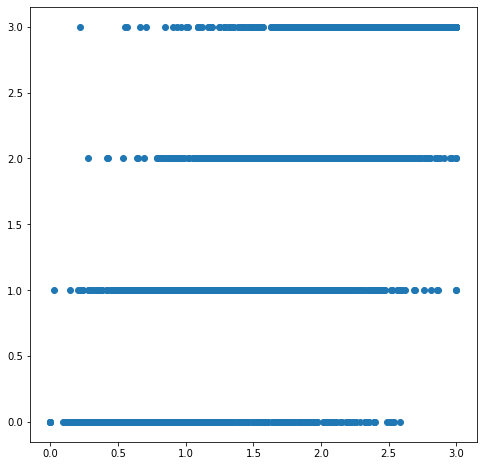

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(oof, train_y)

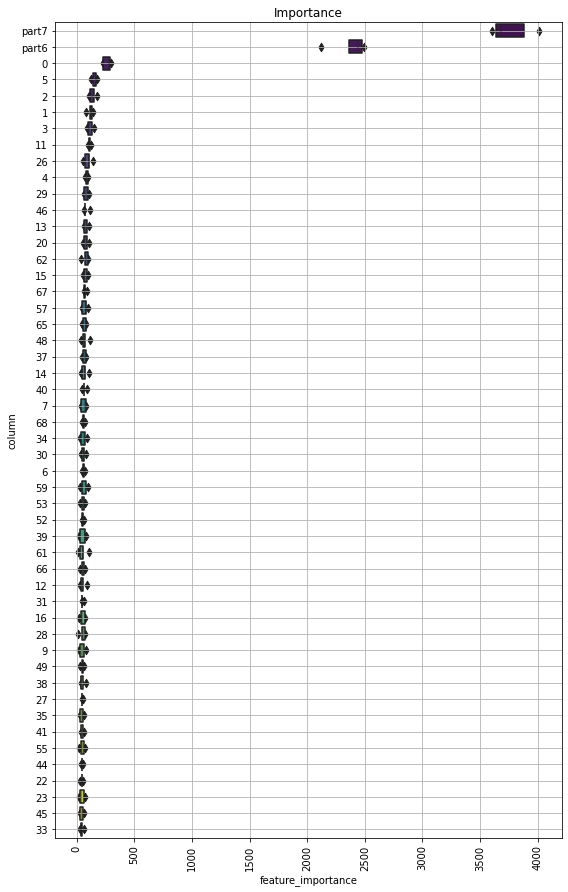

In [30]:
def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.
    
    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    ax.tick_params(axis='x', rotation=90)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

fig, ax = visualize_importance(models, train_x.drop(['object_id', 'art_series_id', 'filenames'],axis=1))

In [31]:
pred = np.array([model.predict(test.drop(['object_id', 'art_series_id', 'target', 'filenames'],axis=1).values) for model in models])
pred = np.mean(pred, axis=0)

In [32]:
pred[pred < 0.0] = 0.0
pred[pred > 3.0] = 3.0

In [40]:
pred = pred.reshape(-1,)

In [41]:
pred.shape

(5919,)

In [ ]:
OUTPUT_DIR =  '/content/drive/MyDrive/atmaCup/#11'

pred = pred.reshape(-1,1)
sub_df = pd.DataFrame(data=pred, index=list(range(len(pred))), columns=['target'])
os.makedirs(os.path.join(OUTPUT_DIR, 'outputs'), exist_ok=True)
sub_df.to_csv(os.path.join(os.path.join(OUTPUT_DIR, 'outputs'), 'submission20210710_0201.csv'), index=False)